## **Detection of Traffic signs using YOLOv3 tiny**

### **Import Dataset**

- Kaggle provides custom dataset created for traffic signs detection for YOLO models and this dataset is originally gathered from GTSDB public archive.
*   The dataset has 4 classes - Prohibitory, Danger, Mandatory and other
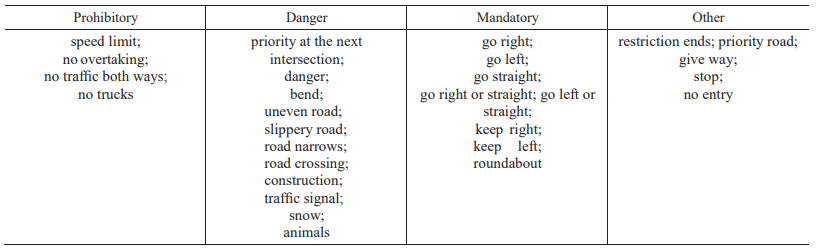
*   Data annotation has already been done
*   The dataset were uploaded to google drive, hence the drive have to be mounted and downloaded to this notebook.
*   Mounting the drive is also help us save the trained weights by the end of this program

In [1]:
#Check if GPU is running

!nvidia-smi

Mon May 23 15:57:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/My Drive/YOLOv3_traffic'

/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
archive  backup


### **Clone DarkNet neural network**

Darknet neural network is the backbone for YOLO

In [4]:
%cd /content

/content


In [5]:
%rm -rf darknet
!git clone 'https://github.com/AlexeyAB/darknet'

Cloning into 'darknet'...
remote: Enumerating objects: 15420, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15420 (delta 1), reused 6 (delta 1), pack-reused 15413
Receiving objects: 100% (15420/15420), 14.08 MiB | 20.89 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


In [6]:
%cd darknet

/content/darknet


### **Building Darknet**

*   Change makefile to enable GPU,CUDA and OpenCV
*   Build darknet running Makefile
*   Update the configuration file according to our necessity
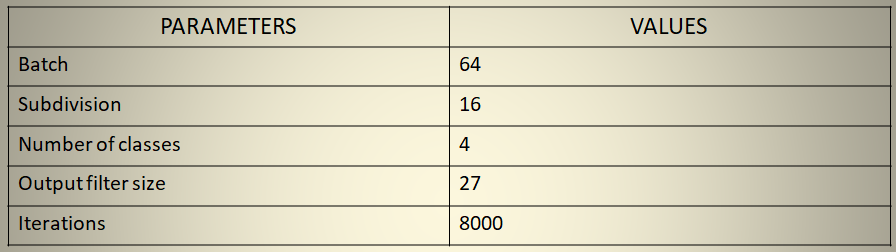
*   Download the pretrained weights of YOLOv3 tiny and apply transfer learning to train the model to classify traffic signs
*   Train the model with the dataset

In [7]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

In [ ]:
!make

In [9]:
!ls
%cd cfg
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results
/content/darknet/cfg
9k.labels				    t1.test.cfg
9k.names				    tiny.cfg
9k.tree					    tiny-yolo.cfg
alexnet.cfg				    tiny-yolo-voc.cfg
cd53paspp-gamma.cfg			    tiny-yolo_xnor.cfg
cifar.cfg				    vgg-16.cfg
cifar.test.cfg				    vgg-conv.cfg
coco9k.map				    voc.data
coco.data				    writing.cfg
coco.names				    yolo.2.0.cfg
combine9k.data				    yolo9000.cfg
crnn.train.cfg				    yolo.cfg
csdarknet53-omega.cfg			    yolov1
cspx-p7-mish.cfg			    yolov2.cfg
cspx-p7-mish_hp.cfg			    yolov2-tiny.cfg
cspx-p7-mish-omega.cfg			    yolov2-tiny-voc.cfg
csresnext50-panet-spp.cfg		    yolov2-voc.cfg
csresnext50-panet-spp-orig

In [10]:
#Need to make a copy of YOLOv3 tiny configuration file

!cp yolov3-tiny.cfg yolov3-my-tiny.cfg

In [11]:
!cat yolov3-my-tiny.cfg

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filter

In [12]:
#Make some changes in the config file
#filters =  (classes+5)x3

!sed -i 's/batch=1/batch=64/' yolov3-my-tiny.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov3-my-tiny.cfg
!sed -i 's/max_batches = 500200/max_batches = 8000/' yolov3-my-tiny.cfg
!sed -i 's/classes=80/classes=4/' yolov3-my-tiny.cfg
!sed -i 's/filters=255/filters=27/' yolov3-my-tiny.cfg

In [13]:
#Download weights of pretrained YOLOv3 tiny
%cd ..

/content/darknet


In [ ]:
!wget https://github.com/GotG/yolotinyv3_medmask_demo/raw/master/yolov3-tiny.conv.15

In [15]:
!ls

3rdparty		darknet.py	       net_cam_v4.sh
backup			darknet_video.py       obj
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
darknet			LICENSE		       video_yolov3.sh
DarknetConfig.cmake.in	Makefile	       video_yolov4.sh
darknet_images.py	net_cam_v3.sh	       yolov3-tiny.conv.15


In [16]:
#Verify dataset for training
%cd '/content/drive/My Drive/YOLOv3_traffic'
import glob 
paths=glob.glob('archive/ts/ts/*.jpg',recursive=True)

/content/drive/My Drive/YOLOv3_traffic


In [17]:
len(paths)

741

### **.data and .names file**

.data and .names files have been uploaded with the full path of the location of train.txt, test.txt and backup. 

.names file contains the labels of the classes - Prohibitory, Danger, Mandatory and others.

These are the files that will be needed for training YOLOv3 tiny other than configuration file and pretrained weights.

### **Training YOLO v3 tiny**

In [18]:
%cd 
%cd /content/darknet

/root
/content/darknet


In [ ]:
!./darknet detector train /content/drive/MyDrive/YOLOv3_traffic/archive/ts_data.data cfg/yolov3-my-tiny.cfg yolov3-tiny.conv.15 -dont_show -ext_output -map

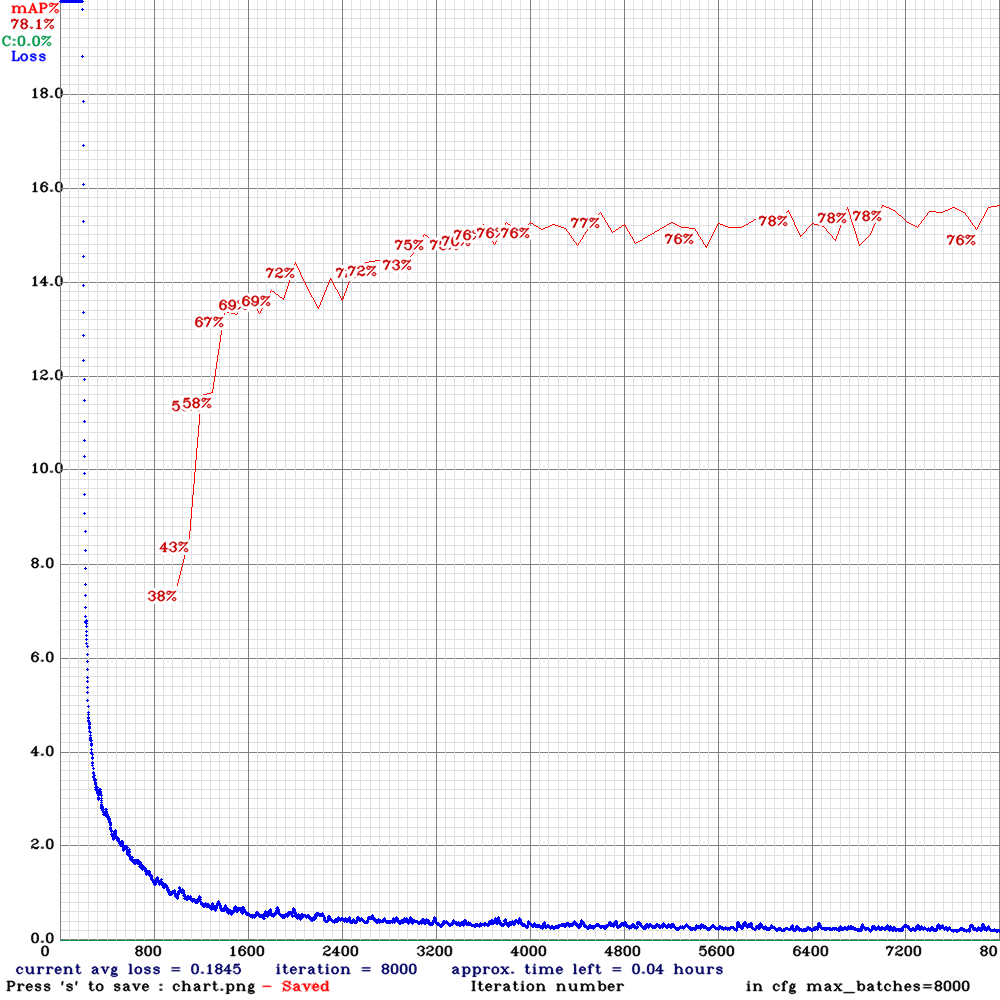

In [20]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread("chart.png")
cv2_imshow(img)

The reason for the graph to begin from 5000th iteration is because the model was trained in two folds 0-5000 and 5000-8000 iterations and the first part chart was overwritten by the second part. 

From the graph it is quite evident that the 8000th iteration produced the best mAP and it is saved as the best weight in backup